# <center> Terrorism around the World - Visualizations </center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
%matplotlib inline 

data = pd.read_csv('D:\ML\Terrorist Attack Prediction\Dataset\globalterrorismdb_0718dist.csv', encoding='latin-1')
data.head()

C:\Users\Raman\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [2]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [3]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [4]:
attack=data.loc[data.iyear==2002][['latitude','longitude']]
attack.latitude.fillna(0, inplace = True)
attack.longitude.fillna(0, inplace = True) 

World =folium.Map(location=[0,0],zoom_start=2)
HeatMap(data=attack, radius=16).add_to(World)

print('Terrorism around the world in 2002')
World

Terrorism around the world in 2002


In [5]:
#my = data.dropna()

my = data
df_counters = pd.DataFrame(
    {'ID' : id,
     'lat' : my.latitude,
     'long' : my.longitude,
     'region' : my.country_txt,
     'year': my.iyear,
     'type': my.attacktype1_txt
    })

df_counters = df_counters.dropna()
arrayName = []
arrayCountry = []
arrayYear = []

for i in df_counters['region']:
    arrayCountry.append(i)
    
for i in df_counters['year']:
    arrayYear.append(i)
    
for i in range(len(df_counters)):
    arrayName.append(i)
    
df_counters.head()
locations = df_counters[['lat', 'long']]
locationlist = locations.values.tolist()
BostonMap=folium.Map(location=[42.738006, -123.417103],zoom_start=4)
for point in range(0, len(locationlist)):
    string = arrayYear[point]
    if arrayCountry[point] == 'United States' and string >= 2001:
        folium.Marker(locationlist[point], popup=string).add_to(BostonMap)

print('Terrorist attacks in the United States after 2001 - Location')
BostonMap

Terrorist attacks in the United States after 2001 - Location


In [6]:
df_counters.head()
arrayType = []
for i in df_counters['type']:
    arrayType.append(i)
    
locations = df_counters[['lat', 'long']]
locationlist = locations.values.tolist()
BostonMap = folium.Map(location=[42.738006, -123.417103],zoom_start=4)
color = 'blue'
for point in range(0, len(locationlist)):
    string = arrayYear[point]
    if arrayCountry[point] == 'United States' and string >= 1980:
        if arrayType[point] in 'Bombing/Explosion':
            color = 'red'
        elif arrayType[point] in 'Assassination':
            color = 'green'
        elif arrayType[point] in 'Armed Assault':
            color = 'purple'
        else:
            color = 'blue'
              
        typeFormat = '{} - {}'.format(arrayType[point], string)
        folium.Marker(locationlist[point], 
                      popup=typeFormat,
                      icon=folium.Icon(color=color)).add_to(BostonMap)
        
print('Terrorist attacks in the United States after 1980 - Location and TypeAttack')
BostonMap

Terrorist attacks in the United States after 1980 - Location and TypeAttack


C:\Users\Raman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


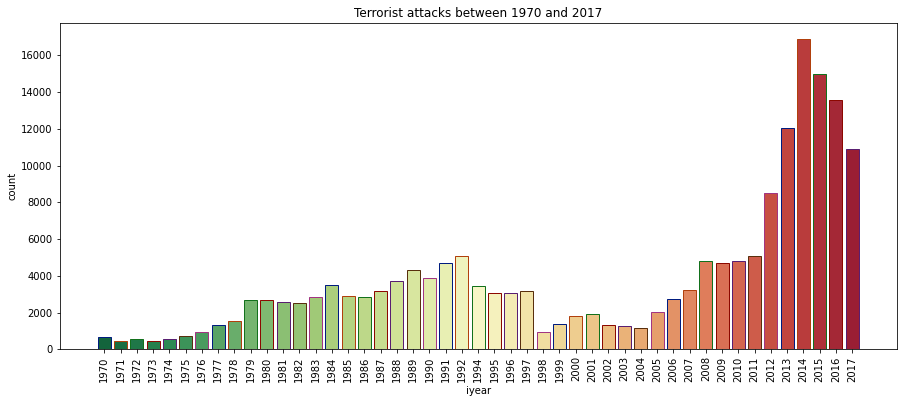

In [7]:
plt.subplots(figsize=(15,6))
sns.countplot('iyear',data=data,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Terrorist attacks between 1970 and 2017')
plt.plot(color="white", lw=2)
plt.show()

In [8]:
data['attacktype1_txt']

0                          Assassination
1            Hostage Taking (Kidnapping)
2                          Assassination
3                      Bombing/Explosion
4         Facility/Infrastructure Attack
                       ...              
181686                     Armed Assault
181687                 Bombing/Explosion
181688    Facility/Infrastructure Attack
181689                 Bombing/Explosion
181690                 Bombing/Explosion
Name: attacktype1_txt, Length: 181691, dtype: object

Text(0.5, 1.0, 'TypeArrack: Assassination X Bombing X ArmedAssault')

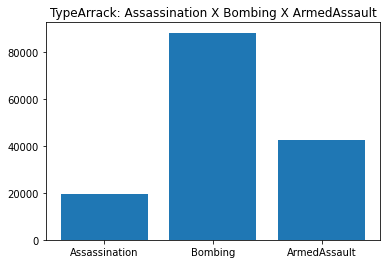

In [9]:
data['attacktype1_txt'] == 'Assassination'

countAssassination = 0
countBombing = 0
countArmedAssault = 0
for nameAttack in data['attacktype1_txt']:
    if nameAttack in 'Assassination':
        countAssassination += 1
    elif nameAttack in 'Bombing/Explosion':
        countBombing += 1
    elif nameAttack in 'Armed Assault':
        countArmedAssault += 1
        
arrayType = ['Assassination','Bombing','ArmedAssault']
arrayCount = [countAssassination, countBombing, countArmedAssault]

plt.bar(arrayType, arrayCount)
plt.title('TypeArrack: Assassination X Bombing X ArmedAssault')


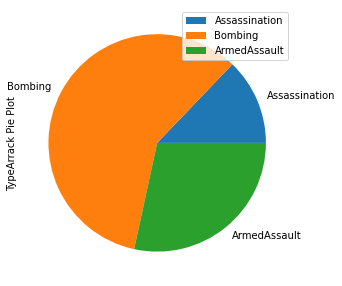

In [10]:
df = pd.DataFrame({'TypeArrack Pie Plot': arrayCount},index=arrayType)
plot = df.plot.pie(y='TypeArrack Pie Plot', figsize=(5, 5))

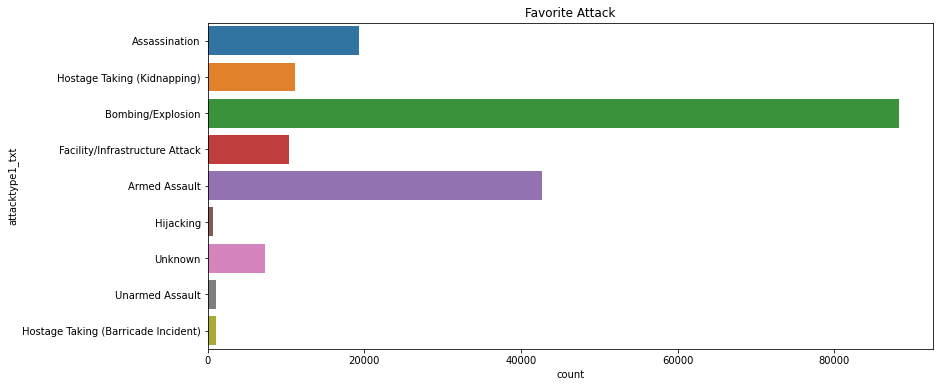

In [11]:
plt.subplots(figsize=(13,6))
sns.countplot(y='attacktype1_txt',data=data)
plt.title('Favorite Attack')
plt.show()

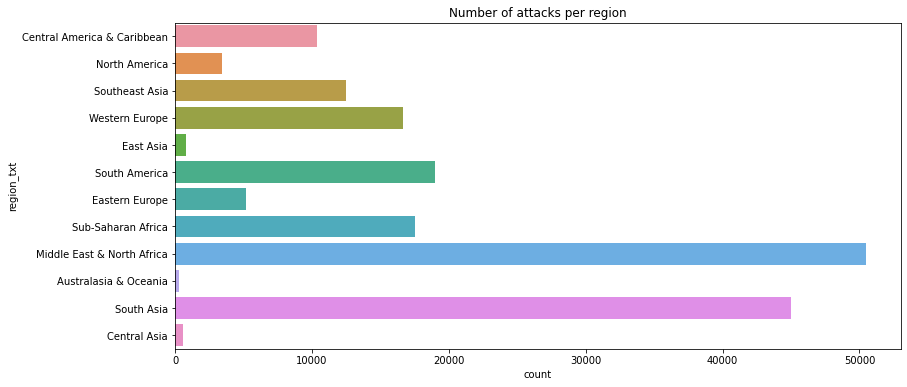

In [12]:
plt.subplots(figsize=(13,6))
sns.countplot(y='region_txt',data=data)
plt.title('Number of attacks per region')
plt.show()

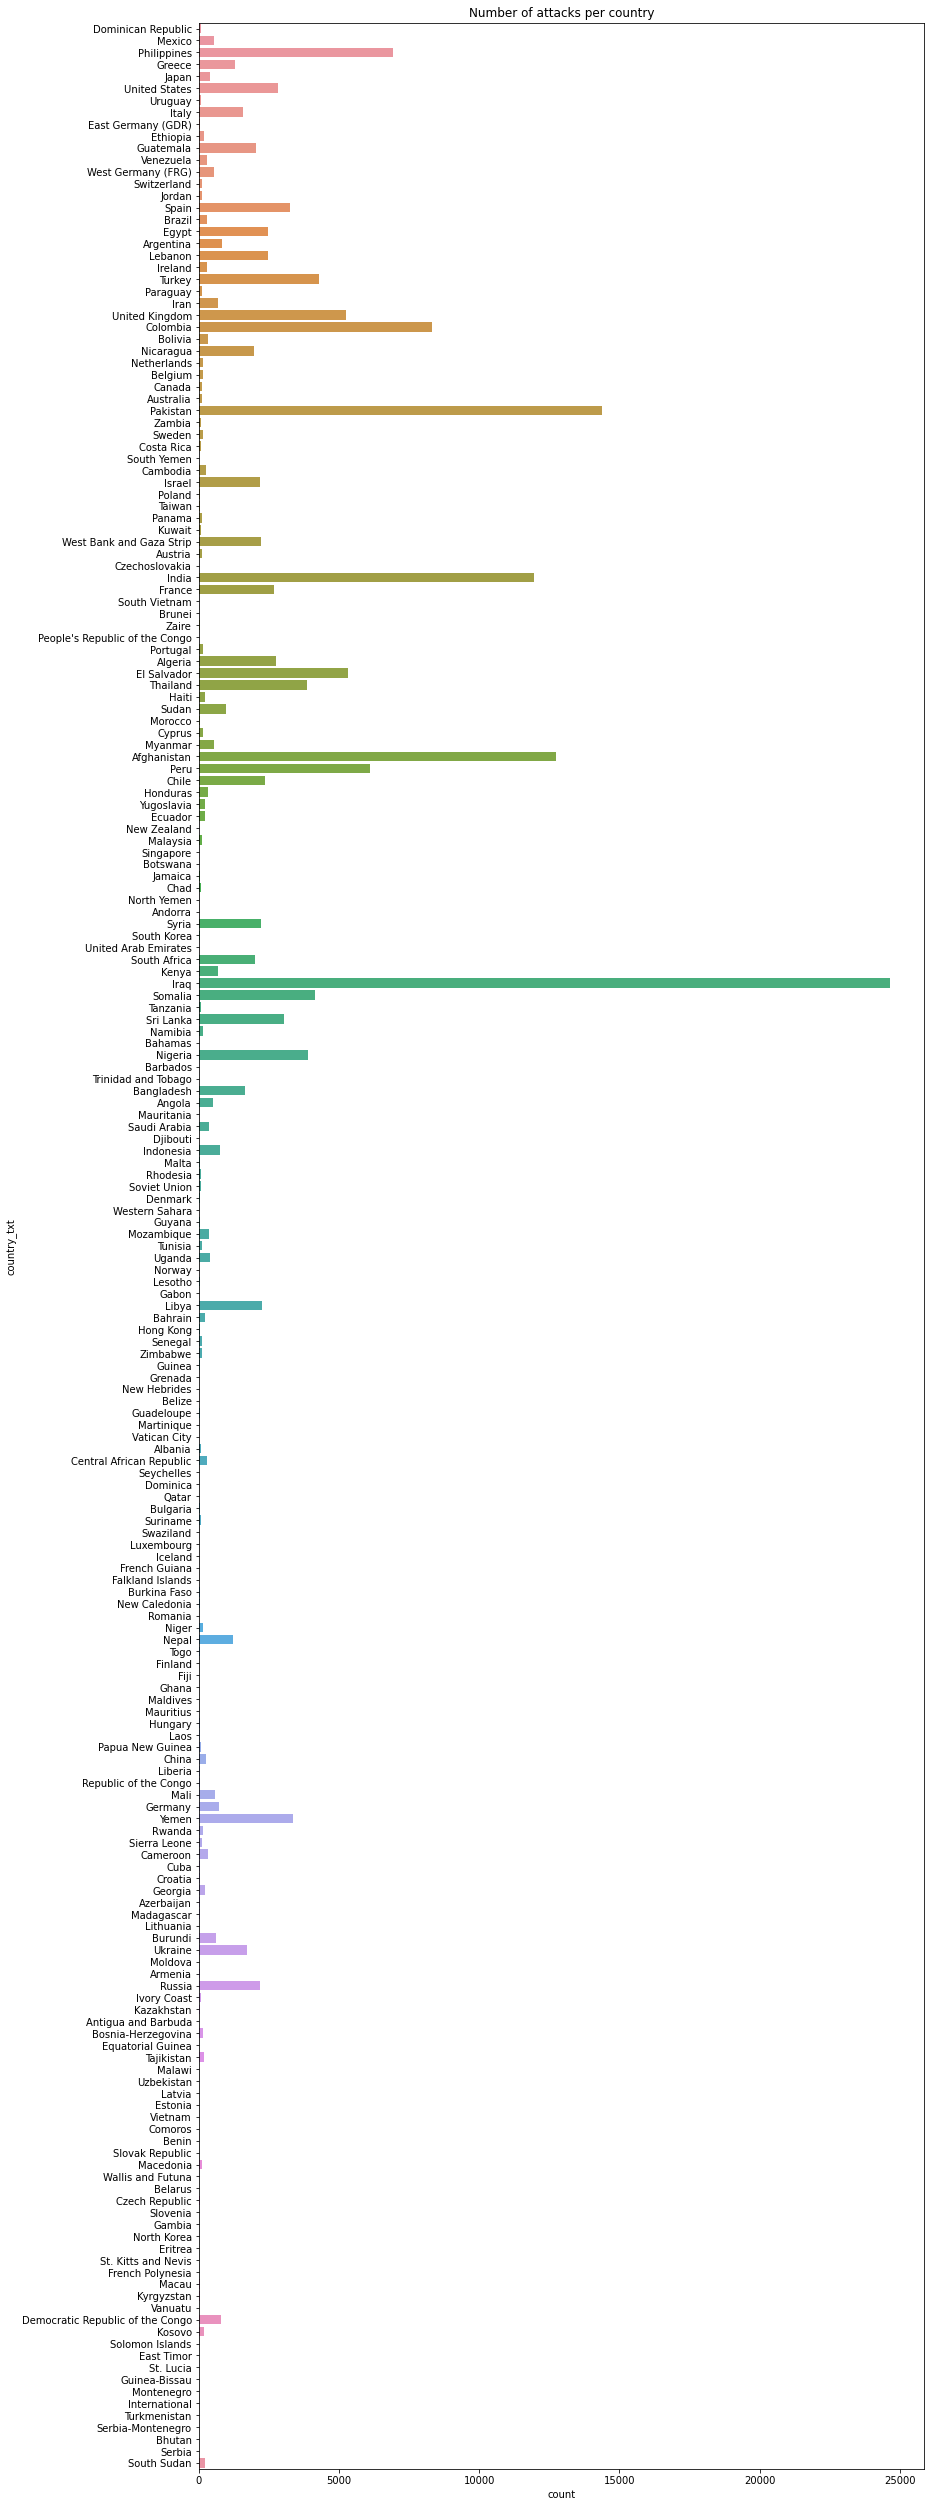

In [13]:
plt.subplots(figsize=(13,45))
sns.countplot(y='country_txt',data=data)
plt.title('Number of attacks per country')
plt.show()

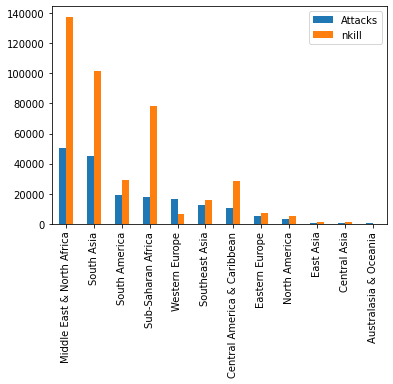

In [14]:
countRegionAttack = data['region_txt'].value_counts().to_frame()
countRegionAttack.columns=['Attacks']

countRegionKill = data.groupby('region_txt')['nkill'].sum().to_frame()
countRegionAttack.merge(countRegionKill,
                        left_index=True, 
                        right_index=True).plot.bar()
plt.show()